## I'm looking forward to your high evaluation!
## If you have any suggestions for improvement, please comment!
This dataset consists of collecting the history and current data of all the most important competitions that Brazilian teams compete.

## I considered the home team's win.

# Features

|Feature|Example|D-type|
|----|----|----|
|datetime|2012-05-19T18:30:00Z|object|
|home_team|Palmeiras-SP|object|
|home_team_state|SP|object|
|away_team|Portuguesa-SP|object|
|away_team_state|SP|object|
|home_goal|1.0|float64|
|away_goal|1.0|float64|
|season|2012|int64|
|round|1|int64|

In [1]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/jogos-do-campeonato-brasileiro/data-raw/csv/brasileirao_matches.csv")
print(df.shape)
df.head(3)

(3800, 9)


,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19T18:30:00Z,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19T18:30:00Z,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19T21:00:00Z,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1


# Data detail

In [3]:
df.describe()

,home_goal,away_goal,season,round
count,3799.000000,3799.000000,3800.000000,3800.000000
mean,1.413793,0.943933,2016.500000,19.500000
std,1.156696,0.975619,2.872659,10.967299
min,0.000000,0.000000,2012.000000,1.000000
25%,1.000000,0.000000,2014.000000,10.000000
50%,1.000000,1.000000,2016.500000,19.500000
75%,2.000000,1.000000,2019.000000,29.000000
max,6.000000,6.000000,2021.000000,38.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         3800 non-null   object 
 1   home_team        3800 non-null   object 
 2   home_team_state  3800 non-null   object 
 3   away_team        3800 non-null   object 
 4   away_team_state  3800 non-null   object 
 5   home_goal        3799 non-null   float64
 6   away_goal        3799 non-null   float64
 7   season           3800 non-null   int64  
 8   round            3800 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 267.3+ KB


In [14]:
df.isnull().sum()

datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          0
away_goal          0
season             0
round              0
Year-Round         0
dtype: int64

In [59]:
# preprocessing
df = df.fillna(0)
df["Year-Round"] = df["season"].astype("str") + "-" + df["round"].astype(str).str.zfill(2)
df["Home-Away"] = df["home_goal"] - df["away_goal"]
df["Win"] = (df["Home-Away"]>0).astype("int8")
df.head(3)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round,Year-Round,Home-Away,Win
0,2012-05-19T18:30:00Z,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1,2012-01,0.0,0
1,2012-05-19T18:30:00Z,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1,2012-01,0.0,0
2,2012-05-19T21:00:00Z,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1,2012-01,1.0,1


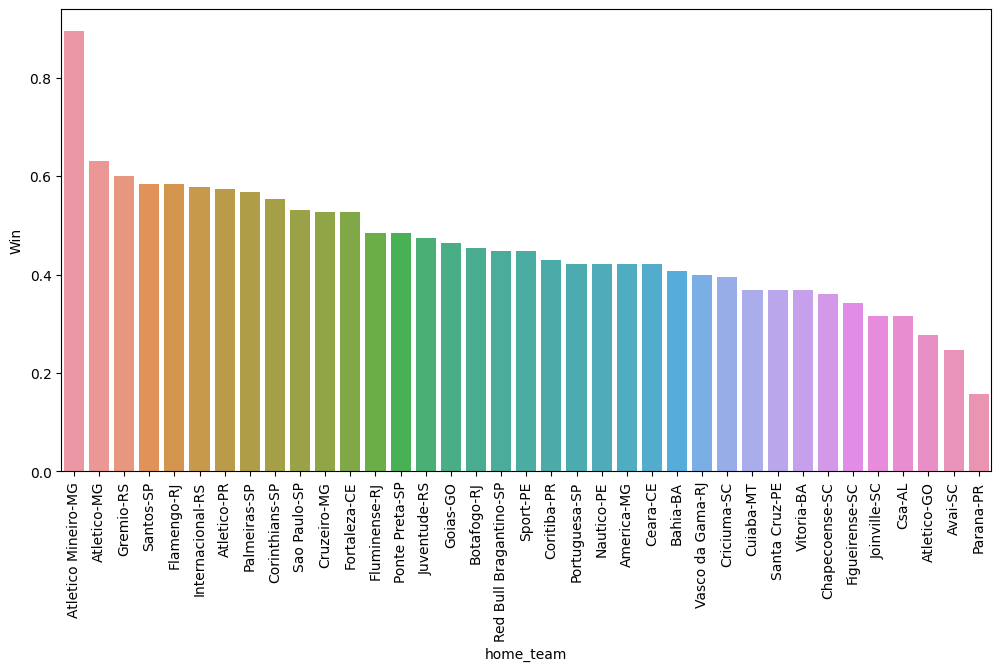

In [60]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("home_team").agg({"Win":"mean"}).sort_values("Win",ascending=False)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Win"])
plt.show()

### Atletico Mineiro-MG's winning rate is abnormally high (as of 2023/10/30)

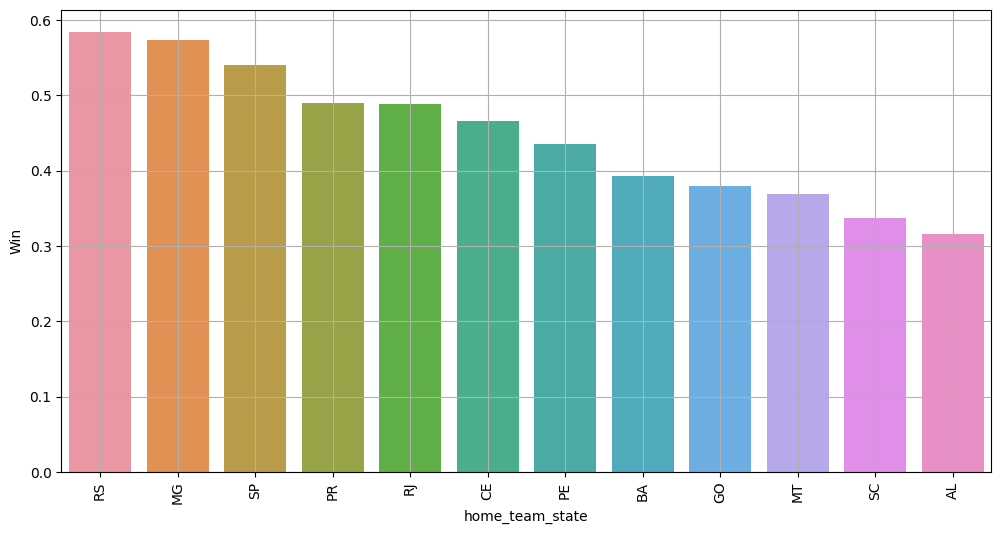

In [61]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("home_team_state").agg({"Win":"mean"}).sort_values("Win",ascending=False)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Win"])
plt.grid(True)
plt.show()

### There are only 3 states with a win rate above 50%.

Mean:0.47


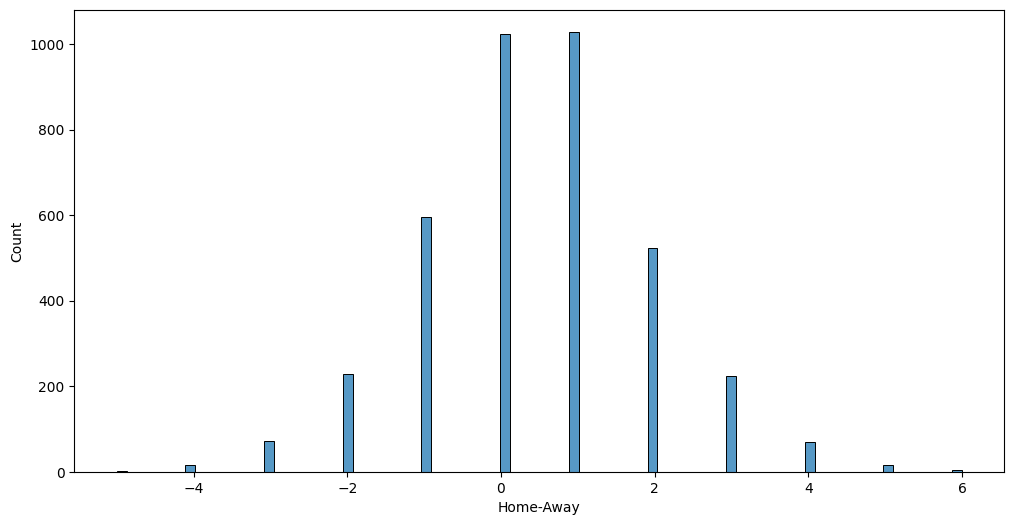

In [62]:
plt.figure(figsize=(12,6))
print(f"Mean:{df['Home-Away'].mean():.2f}")
sns.histplot(df["Home-Away"])
plt.show()

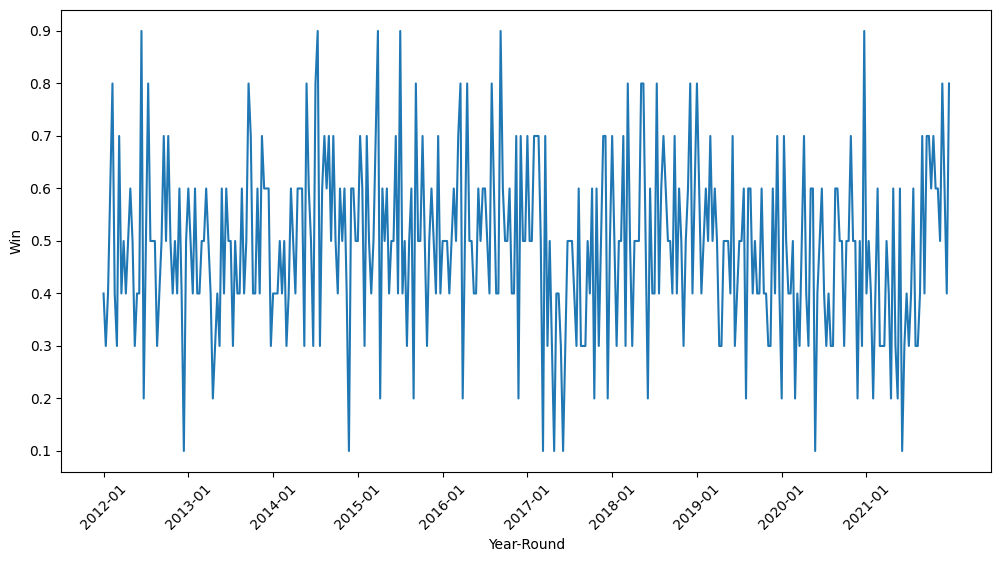

In [71]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("Year-Round").agg({"Win":"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df["Win"])

x_labels = tmp_df.index[::38]
plt.xticks(np.arange(len(tmp_df), step=38), x_labels, rotation=45)
plt.show()

# Conclusion
1. Atletico Mineiro-MG's winning rate is abnormally high 
2. There are only 3 states with a win rate above 50%.
3. The home team scores 0.47 points more on average.

As of 2023/10/30